## Play with old code

In [2]:
# from graspologic.embed import CovariateAssistedSpectralEmbed

import numpy as np
import graspologic as gs
from graspologic.simulations import sbm
from graspologic.plot import heatmap, pairplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(8889)

### Generate covariates matrix

In [47]:
?sbm

Signature:
sbm(
    n,
    p,
    directed=False,
    loops=False,
    wt=1,
    wtargs=None,
    dc=None,
    dc_kws={},
    return_labels=False,
)
Docstring:
Samples a graph from the stochastic block model (SBM).

SBM produces a graph with specified communities, in which each community can
have different sizes and edge probabilities.

Read more in the :ref:`tutorials <simulations_tutorials>`

Parameters
----------
n: list of int, shape (n_communities)
    Number of vertices in each community. Communities are assigned n[0], n[1], ...

p: array-like, shape (n_communities, n_communities)
    Probability of an edge between each of the communities, where ``p[i, j]`` indicates
    the probability of a connection between edges in communities ``[i, j]``.
    ``0 < p[i, j] < 1`` for all ``i, j``.

directed: boolean, optional (default=False)
    If False, output adjacency matrix will be symmetric. Otherwise, output adjacency
    matrix will be asymmetric.

loops: boolean, optional (default=Fal

In [45]:
P = np.full((3, 3), .9)
P[np.diag_indices_from(P)] = .2

P

array([[0.2, 0.9, 0.9],
       [0.9, 0.2, 0.9],
       [0.9, 0.9, 0.2]])

In [10]:
n = 5
p, q = .9, .3
# p, q = .5, .2
P = np.array([[p, q, q], 
              [q, p, q],
              [q, q, p]])
A, labels = sbm([n, n, n], P, return_labels=True)

# generate a reasonable covariate matrix for A.
# in the kth block, the probability of the kth covariate being 1 is m1
# and the probability of the other covariates being 1 is m2
m1, m2 = .9, .1
# m1, m2 = .8, .2

M = np.array([[m1, m2, m2],
              [m2, m1, m2],
              [m2, m2, m1]])

# Generate X
def gen_covariates(m1, m2, labels):
    n = len(labels)
    m1_arr = np.random.choice([1, 0], p=[m1, 1-m1], size=n)
    m2_arr = np.random.choice([1, 0], p=[m2, 1-m2], size=(n, 3))
    m2_arr[np.arange(n), labels] = m1_arr
    return m2_arr

X = gen_covariates(1, 0, labels)

In [20]:
X = gen_covariates(1, 0, labels=np.array([0, 1, 2]))
np.array_equal(X, np.eye(3))

True

In [22]:
I = np.eye(3)
np.repeat(I, 3, axis=0)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [35]:
m1 = 1
m2 = 0

m1_arr = np.random.choice([1, 0], p=[m1, 1-m1], size=n)
m2_arr = np.random.choice([1, 0], p=[m2, 1-m2], size=(n, 3))

m2_arr[[0, 1], [1, 1]] = 1
m2_arr

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [30]:
np.random.choice([1, 0], p=[1, 0], size=(n, 3))

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

<AxesSubplot:>

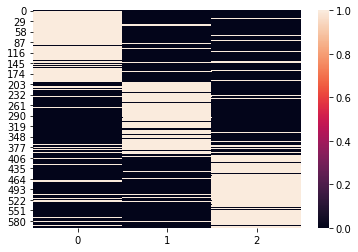

In [80]:
sns.heatmap(X)

<AxesSubplot:>

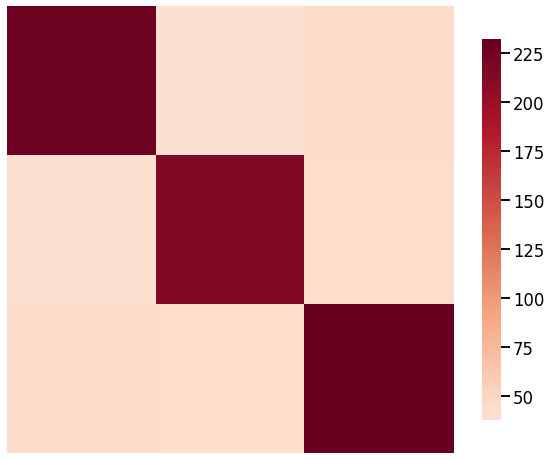

In [81]:
heatmap(X.T@X)

<AxesSubplot:>

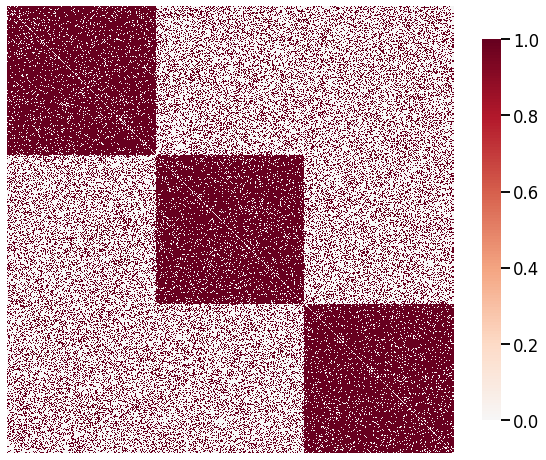

In [82]:
heatmap(A)

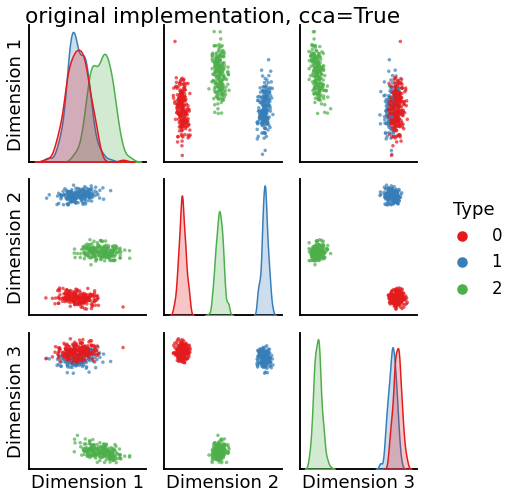

In [91]:
casc = CovariateAssistedSpectralEmbed(form='R-DAD', regularizer=1, 
                                      n_components=3, assortative=True,
                                      cca=True, check_lcc=False)
clusters, embedding, h_ops, inertia = casc.fit_predict(A, X)
pairplot(embedding, labels=clusters, title="original implementation, cca=True")

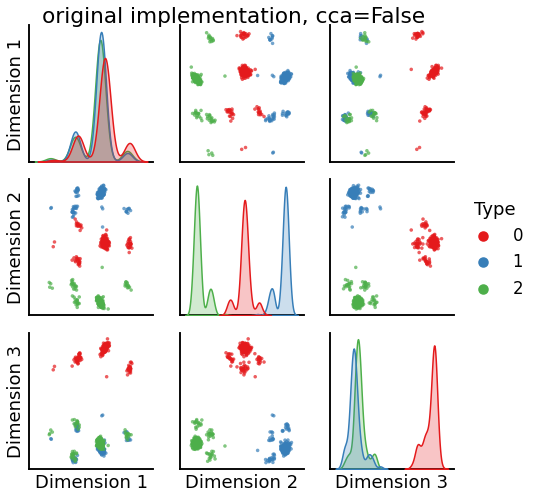

In [92]:
casc = CovariateAssistedSpectralEmbed(form='R-DAD', regularizer=1, 
                                      n_components=3, assortative=True,
                                      cca=False)
clusters, embedding, h_ops, inertia = casc.fit_predict(A, X)
pairplot(embedding, labels=clusters, title="original implementation, cca=False")